# 03_cross_valid

1. Zaimplementuj cross validation dla datsetu wine:
    <br>podziel go używając osobno Kfold oraz StratifiedKFold 
    <br>użyj for loop aby wyznaczyć dla każdego podzbioru: 
    <br>liczebność poszczególnych klas (np używając np.bincount)
    <br>rozmiar zbioru train i test
    <br>score dla zbioru train i test
    <br>wyznacz score dla dla całego datasetu
<br>Aby wykonać zadanie utwórz dwie osobne pętle dla Kfold i dla StratifiedKfold.

2. Skorzystaj z  cros_val_score dla dotasetu z pkt.1 :
cv=3, cv=5, cv=10
porównaj czas wykonania CV (skorzystaj np z magic commands w JupyterNotebook)
3. Porównaj wyniki z pkt 1, 2

4. *Przygotuj kod, który będzie dzielił dataset na train, test valid. 
5. *Poczytaj o StratifiedShuffleSplit

Rozwiązanie prześlij jako printscreen (jpg, pdf).
Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_03.jpg



In [1]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = load_wine()['data'], load_wine()['target']

In [3]:
df = pd.DataFrame(columns=['Model', 'Score'])

# 1

In [4]:
kf = KFold(n_splits=4, shuffle = True, random_state = 1)
kn = KNeighborsClassifier()

dataset_scores = []


for fold_nb, (train_index, test_index) in enumerate(kf.split(X, y)):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kn.fit(X_train, y_train)
    dataset_scores.append(kn.score(X_test,y_test))
    
    
    print("Fold number", fold_nb+1)
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    
    classes = np.unique(y_train)
    total = len(y_train)
    for c in classes:
        n_examples = len(y[y==c])
        percent = n_examples / total * 100
        print('Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    print(f'Test size: {len(X_test)}')
    print(f'Train size: {len(X_train)}')
    print(f'Train score: {kn.score(X_train,y_train)*100}%')
    print(f'Test score: {round(kn.score(X_test,y_test),2)*100}%\n')

print(f'Dataset score: {round(np.mean(dataset_scores),2)*100}%')


df1 = pd.DataFrame({'Model':"KFold" ,'Score':round(np.mean(dataset_scores),2)*100},index = [0])
df =pd.concat([df,df1],ignore_index=True)

Fold number 1
TRAIN: [  0   1   2   3   6   7   8   9  10  12  13  15  17  18  20  21  22  23
  24  25  26  27  28  30  32  33  34  36  37  38  41  43  44  45  46  49
  50  52  55  57  58  60  61  62  63  64  65  66  67  68  70  71  72  74
  75  76  77  78  79  80  82  83  85  86  87  88  89  90  92  93  95  96
  98  99 100 101 102 103 104 106 109 110 111 115 116 118 119 121 122 123
 124 125 127 128 129 131 132 133 134 135 136 137 139 140 141 142 143 144
 145 146 148 149 150 153 154 155 156 157 158 163 164 166 167 168 169 170
 171 172 173 174 175 176 177]
TEST: [  4   5  11  14  16  19  29  31  35  39  40  42  47  48  51  53  54  56
  59  69  73  81  84  91  94  97 105 107 108 112 113 114 117 120 126 130
 138 147 151 152 159 160 161 162 165]
Class=0 : 59/133 (44.4%)
Class=1 : 71/133 (53.4%)
Class=2 : 48/133 (36.1%)
Test size: 45
Train size: 133
Train score: 82.70676691729322%
Test score: 69.0%

Fold number 2
TRAIN: [  1   3   4   5   7   8   9  10  11  14  15  16  19  20  22  23  24  2

In [5]:
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 1)

kn = KNeighborsClassifier()

dataset_scores = []


for fold_nb, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kn.fit(X_train, y_train)
    dataset_scores.append(kn.score(X_test,y_test))
    
    print("Fold number", fold_nb+1)
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    
    classes = np.unique(y_train)
    total = len(y_train)
    for c in classes:
        n_examples = len(y[y==c])
        percent = n_examples / total * 100
        print('Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    print(f'Test size: {len(X_test)}')
    print(f'Train size: {len(X_train)}')
    print(f'Train score: {kn.score(X_train,y_train)*100}%')
    print(f'Test score: {round(kn.score(X_test,y_test),2)*100}%\n')

print(f'Dataset score: {round(np.mean(dataset_scores),2)*100}%')

df1 = pd.DataFrame({'Model':"StratifiedKFold" ,'Score':round(np.mean(dataset_scores),2)*100},index = [0])
df =pd.concat([df,df1],ignore_index=True)

Fold number 1
TRAIN: [  0   2   3   4   5   6   7   8   9  10  12  13  14  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  32  33  36  37  38  39  40  41
  42  43  45  47  49  51  57  58  59  61  63  64  65  66  67  69  70  71
  72  73  74  76  78  79  80  81  82  83  85  88  89  90  92  94  97  98
  99 100 101 102 103 104 105 106 108 109 111 112 113 114 115 116 117 120
 121 122 123 125 126 128 129 130 131 133 134 137 138 139 140 143 144 146
 147 148 149 150 151 152 153 154 155 157 158 159 160 162 164 165 166 168
 169 171 172 173 174 175 177]
TEST: [  1  11  15  26  34  35  44  46  48  50  52  53  54  55  56  60  62  68
  75  77  84  86  87  91  93  95  96 107 110 118 119 124 127 132 135 136
 141 142 145 156 161 163 167 170 176]
Class=0 : 59/133 (44.4%)
Class=1 : 71/133 (53.4%)
Class=2 : 48/133 (36.1%)
Test size: 45
Train size: 133
Train score: 82.70676691729322%
Test score: 60.0%

Fold number 2
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  15  16  18  19  20  2

# 2

In [6]:
kn = KNeighborsClassifier()

list = [3, 5, 10]
for i in list:
    print(f'Cv: {i}')
    print(cross_val_score(kn, X, y, cv=i))
    print("Max: ", max(cross_val_score(kn, X, y, cv=i)), "\n")
    df1 = pd.DataFrame({'Model':f'cross_val_score cv {i}' ,'Score':round(max(cross_val_score(kn, X, y, cv=i)),2)*100},index = [0])
    df =pd.concat([df,df1],ignore_index=True)
        

Cv: 3
[0.61666667 0.61016949 0.76271186]
Max:  0.7627118644067796 

Cv: 5
[0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]
Max:  0.7714285714285715 

Cv: 10
[0.66666667 0.66666667 0.61111111 0.61111111 0.61111111 0.61111111
 0.72222222 0.66666667 0.82352941 0.76470588]
Max:  0.8235294117647058 



In [7]:
%time print(cross_val_score(kn, X, y, cv=3))

%time print(cross_val_score(kn, X, y, cv=5))

%time print(cross_val_score(kn, X, y, cv=10))

[0.61666667 0.61016949 0.76271186]
Wall time: 10.2 ms
[0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]
Wall time: 12 ms
[0.66666667 0.66666667 0.61111111 0.61111111 0.61111111 0.61111111
 0.72222222 0.66666667 0.82352941 0.76470588]
Wall time: 21 ms


# 3

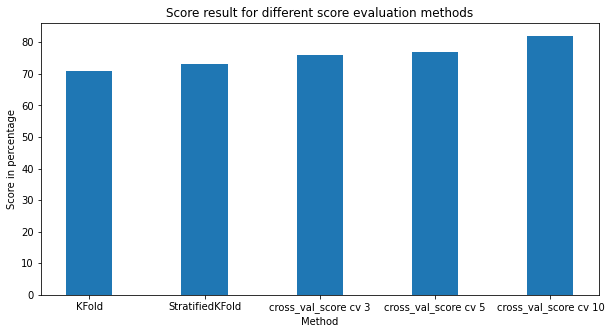

In [8]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df.Model, df.Score,
        width = 0.4)
plt.title("Score result for different score evaluation methods")
plt.xlabel("Method")
plt.ylabel("Score in percentage")

plt.show()

# 4

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.5)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)